In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import binom
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import PercentFormatter

## Setup and Distributions

In [3]:
def plot_binomial_distribution(n, p):
    # create a binomial distribution object
    dist = binom(n, p)

    # generate x values from 0 to n
    x = np.arange(n+1)

    # calculate the probability mass function (PMF) for each x value
    pmf = dist.pmf(x)

    # create a line plot of the PMF using Seaborn
    sns.lineplot(x=x, y=pmf,label=str(p))

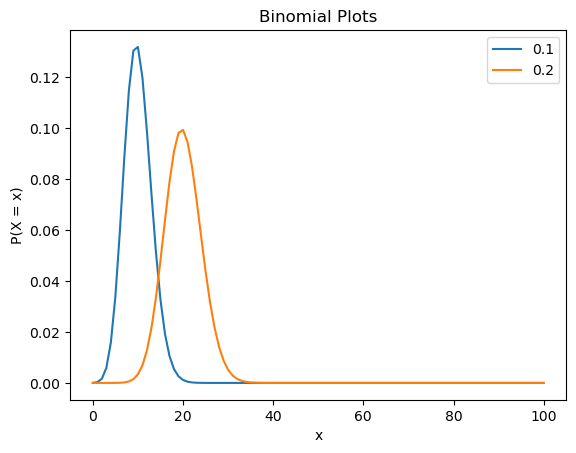

In [4]:
plot_binomial_distribution(100,0.1)
plot_binomial_distribution(100,0.2)
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.title("Binomial Plots")
plt.legend()

## Success Probability

In [3]:
def success_probability(n,p,A,p_prime,k):
    dist_1 = binom(n-k,p)
    dist_2 = binom(k,p_prime)
    total_prob = 0

    for i in range(A,n+1):
        min_possible = 0
        max_possible = min(A,k)

        for k_right in range(min_possible,max_possible+1):
            prob_k = dist_2.pmf(k_right)
            prob_other = dist_1.pmf(i-k_right)
            total_prob += prob_k*prob_other

    return total_prob

In [4]:
success_probability(100,0.8,80,0.9,20)

0.7484984977424062

In [5]:
success_probability(100,0.8,80,0.9,50)

0.9356245211452082

In [6]:
success_probability(100,0.8,80,0.9,0)

0.5594615848733976

In [7]:
success_probability(100,0.8,80,1,1)

0.5793216278351632

In [8]:
n_fixed = 100
A_fixed = 85
p_fixed = 0.8
p_prime_vals = np.arange(0.6,1.01,0.05)
k_vals = np.arange(0,51,5)

In [9]:
baseline = success_probability(n_fixed,p_fixed,A_fixed,0,0)

In [10]:
values = np.zeros((len(p_prime_vals),len(k_vals)))
for i,p_prime in enumerate(p_prime_vals):
    for j,k in enumerate(k_vals):
        p_prime = min(p_prime,1)
        values[i,j] = round((success_probability(n_fixed,p_fixed,A_fixed,p_prime,k)-baseline)*100)

In [24]:
p_prime_vals

array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

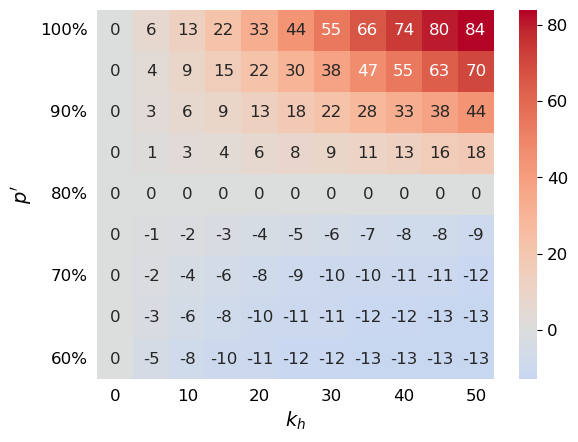

In [52]:
ax = sns.heatmap(values,xticklabels=[round(i,2) if i%10 == 0 else '' for i in k_vals], yticklabels=[str(round(i*100))+"%" if round(i*100)%10 == 0 else '' for i in p_prime_vals],
                 center=0, cmap='coolwarm', annot=True, annot_kws={"fontsize":12})
ax.invert_yaxis()
ax.tick_params(left=False, bottom=False)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.xlabel("$k_h$",fontsize=14)
plt.ylabel("$p'$",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.savefig('../Figures/heatmap_numerics.pdf', dpi=300, bbox_inches='tight')    
plt.show()

In [12]:
k_fixed = 20

In [13]:
x = np.linspace(0,1,1000)
y = success_probability(n_fixed,p_fixed,A_fixed,x,k_fixed)-baseline

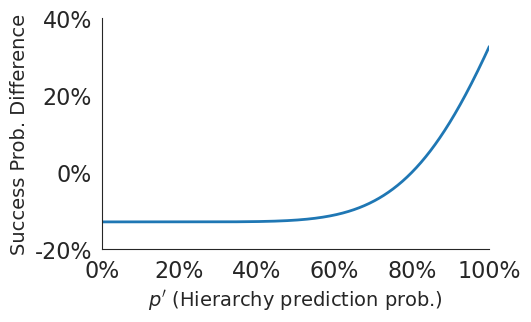

In [74]:
plt.figure(figsize=(5,3))
sns.set_style("white")
sns.despine(left=False, bottom=False)
sns.lineplot(x=x, y=y, linewidth=2)
plt.xlabel('$p\'$ (Hierarchy prediction prob.)',fontsize=14)
plt.ylabel('Success Prob. Difference',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim([0,1])
plt.yticks([-0.2,0,0.2,0.4])
plt.yticks(plt.gca().get_yticks(),fontsize=16, labels=['{:.0%}'.format(x) for x in plt.gca().get_yticks()])
plt.xticks(plt.gca().get_xticks(),fontsize=16, labels=['{:.0%}'.format(x) for x in plt.gca().get_xticks()])
plt.savefig('../Figures/lineplot_numerics.pdf', dpi=300, bbox_inches='tight')    
plt.show()

In [83]:
x = np.linspace(0.7,0.9,100)
y = success_probability(n_fixed,p_fixed,A_fixed,x,k_fixed)-baseline

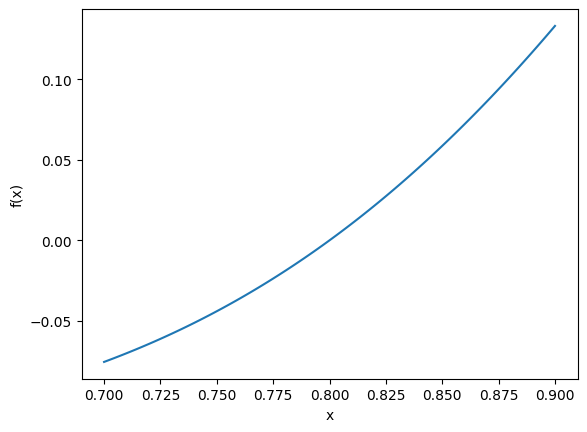

In [84]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()